In [1]:
from nanopyx.liquid import Convolution2D as Conv
from nanopyx.methods import Conv2D_w

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.transform import resize
import seaborn as sns

input_image = np.random.random((1500,1500)).astype(np.float32)
input_kernel = np.ones((31,31)).astype(np.float32)
max_iter = 150

/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for _njit_interpolate
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for njit_shift_magnify
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for njit_shift_scale_rotate
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/_le_mandelbrot_benchmark_.py:17: UserWarning: Numba is not installed. Using pure python for _njit_mandelbrot
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/_le_mandelbrot_benchmark_.py:17: UserWarning: Numba is not installed. Using pure python for njit_mandelbrot
  warnings.warn(


In [2]:
normal_liquid_time = []
normal_liquid_type = []
out = Conv(clear_benchmarks=True, testing=True).benchmark(input_image,input_kernel)
cw = Conv2D_w(input_image, input_kernel)
for i in range(max_iter):
    output, run_type, run_time = cw.run()
    normal_liquid_time.append(run_time)
    normal_liquid_type.append(run_type)

Fastest run type: OpenCL_Apple M1 Pro
Slowest run type: Unthreaded
OpenCL_Apple M1 Pro is 5.35x faster than Threaded_guided
OpenCL_Apple M1 Pro and Threaded_guided have similar outputs!
OpenCL_Apple M1 Pro is 5.40x faster than Threaded_dynamic
OpenCL_Apple M1 Pro and Threaded_dynamic have similar outputs!
OpenCL_Apple M1 Pro is 5.64x faster than Threaded
OpenCL_Apple M1 Pro and Threaded have similar outputs!
OpenCL_Apple M1 Pro is 6.57x faster than Threaded_static
OpenCL_Apple M1 Pro and Threaded_static have similar outputs!
OpenCL_Apple M1 Pro is 35.84x faster than Unthreaded
OpenCL_Apple M1 Pro and Unthreaded have similar outputs!
Threaded_guided is 1.01x faster than Threaded_dynamic
Threaded_guided and Threaded_dynamic have similar outputs!
Threaded_guided is 1.06x faster than Threaded
Threaded_guided and Threaded have similar outputs!
Threaded_guided is 1.23x faster than Threaded_static
Threaded_guided and Threaded_static have similar outputs!
Threaded_guided is 6.70x faster than U

In [3]:
normal_solid_time = []
normal_solid_type = []
out = Conv(clear_benchmarks=True, testing=True).benchmark(input_image,input_kernel)
cw = Conv2D_w(input_image, input_kernel)
for i in range(max_iter):
    output, run_type, run_time = cw.run(_force_run_type="OpenCL_Apple M1 Pro")
    normal_solid_time.append(run_time)
    normal_solid_type.append(run_type)

Fastest run type: OpenCL_Apple M1 Pro
Slowest run type: Unthreaded
OpenCL_Apple M1 Pro is 5.90x faster than Threaded_dynamic
OpenCL_Apple M1 Pro and Threaded_dynamic have similar outputs!
OpenCL_Apple M1 Pro is 5.93x faster than Threaded_guided
OpenCL_Apple M1 Pro and Threaded_guided have similar outputs!
OpenCL_Apple M1 Pro is 6.01x faster than Threaded_static
OpenCL_Apple M1 Pro and Threaded_static have similar outputs!
OpenCL_Apple M1 Pro is 6.07x faster than Threaded
OpenCL_Apple M1 Pro and Threaded have similar outputs!
OpenCL_Apple M1 Pro is 39.57x faster than Unthreaded
OpenCL_Apple M1 Pro and Unthreaded have similar outputs!
Threaded_dynamic is 1.00x faster than Threaded_guided
Threaded_dynamic and Threaded_guided have similar outputs!
Threaded_dynamic is 1.02x faster than Threaded_static
Threaded_dynamic and Threaded_static have similar outputs!
Threaded_dynamic is 1.03x faster than Threaded
Threaded_dynamic and Threaded have similar outputs!
Threaded_dynamic is 6.70x faster t

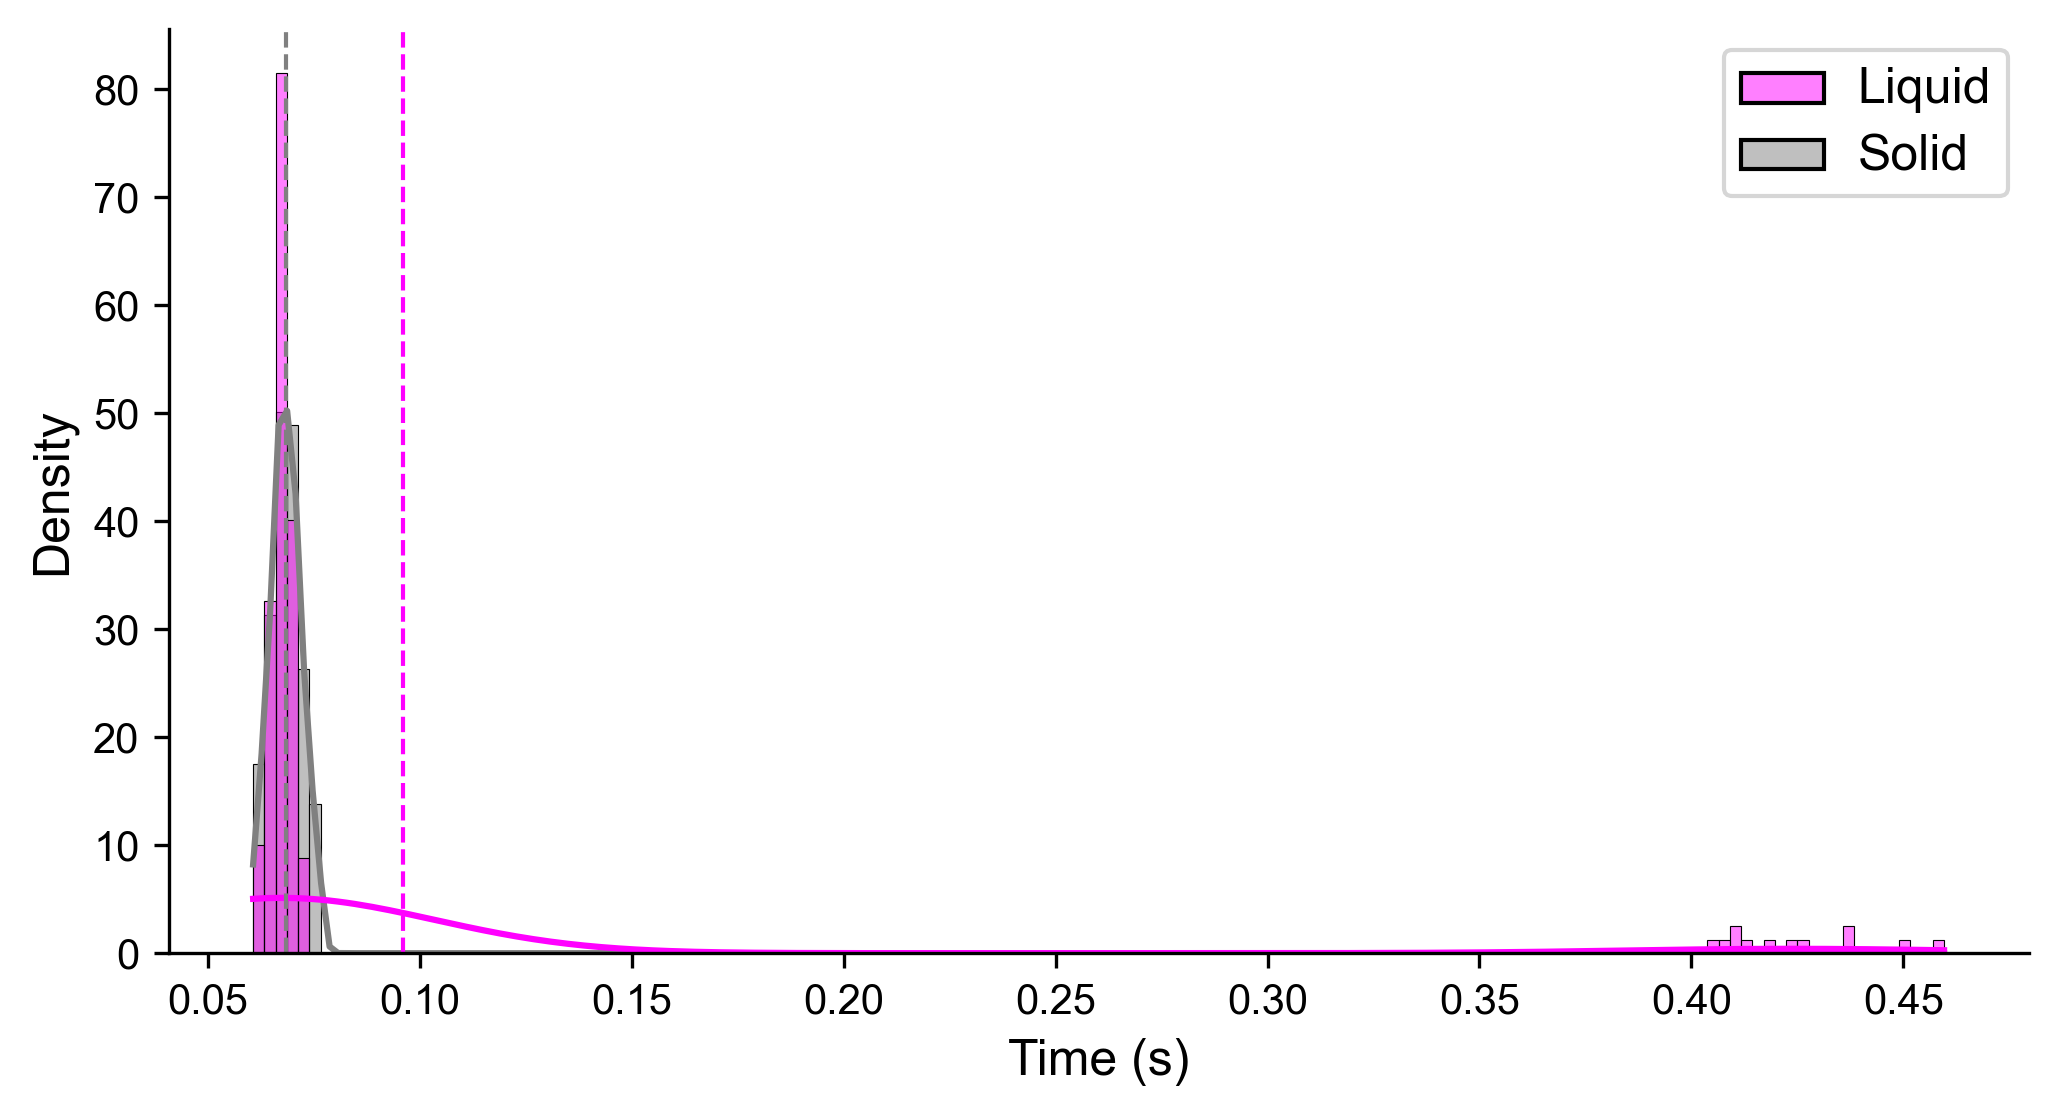

In [6]:
df = pd.DataFrame({'Liquid':normal_liquid_time,'Solid':normal_solid_time})

plt.figure(figsize=(8,4), dpi=300)
ax = sns.histplot(data=df, bins=150, stat='density', kde=True, palette=['magenta','gray'])
plt.axvline(df['Liquid'].mean(), color='magenta', linestyle='dashed', linewidth=1)
plt.axvline(df['Solid'].mean(), color='gray', linestyle='dashed', linewidth=1)
plt.xlabel('Time (s)', fontname='Arial', fontsize=12)
plt.ylabel('Density', fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
plt.setp(ax.get_legend().get_texts(), fontname="Arial", fontsize=12)
ax.spines[['top', 'right']].set_visible(False)
plt.show()

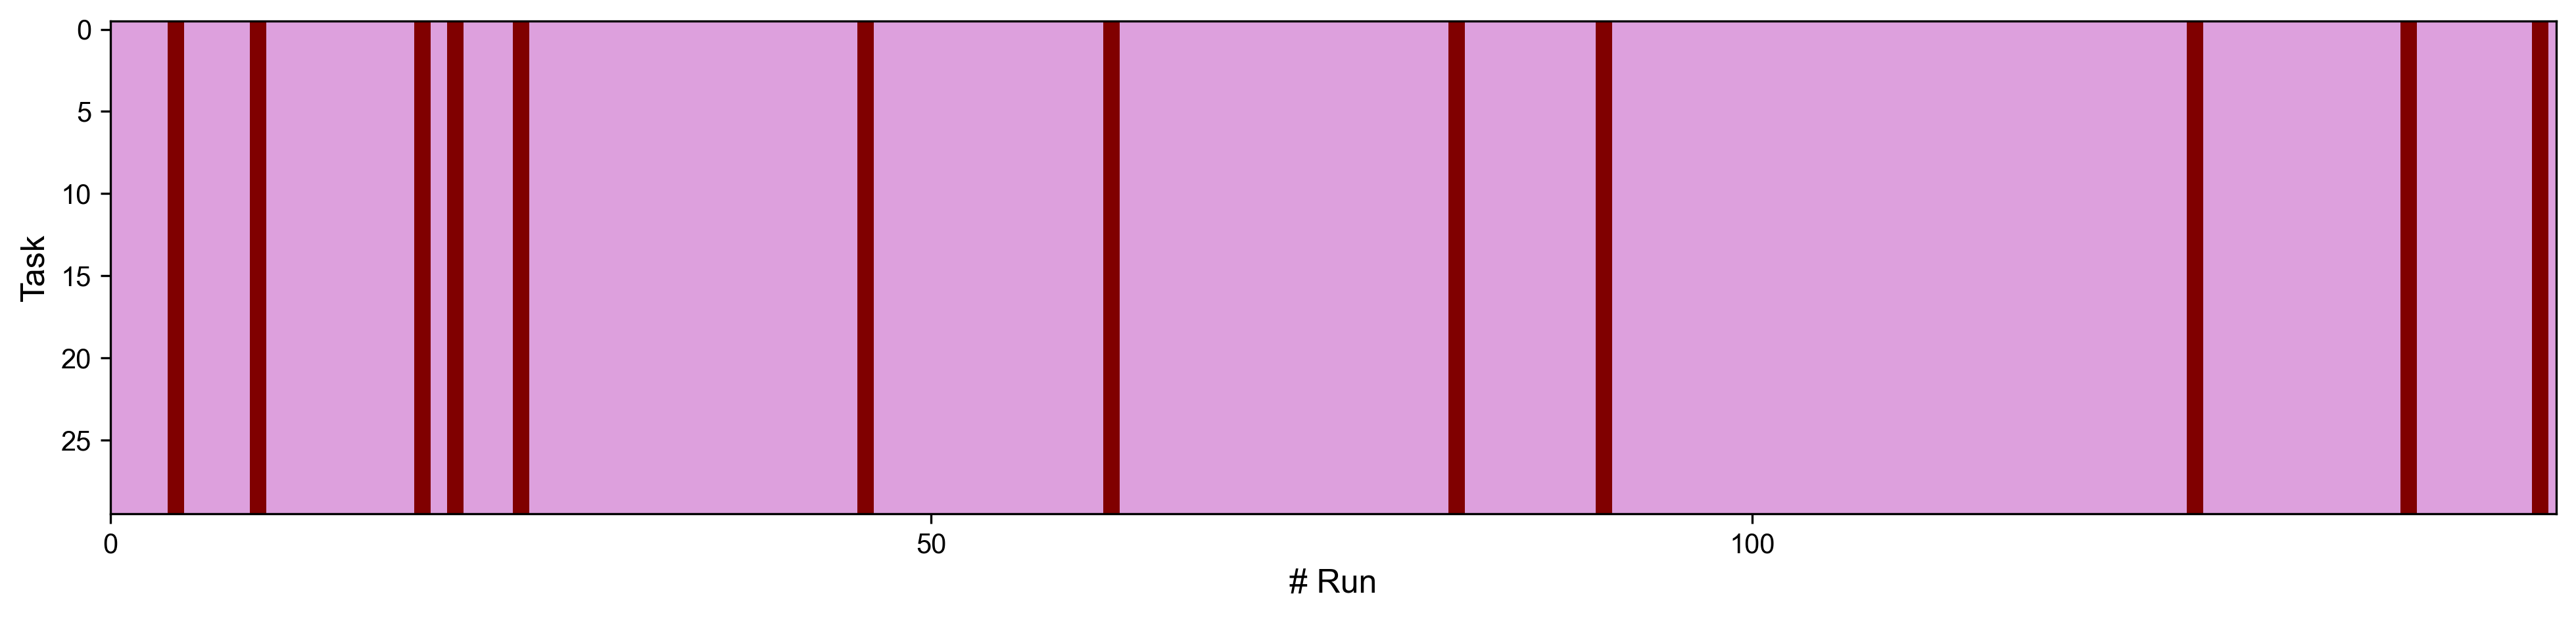

In [5]:
methods = {'OpenCL_Apple M1 Pro':1,'Threaded':2, 'Threaded_static':2, 'Threaded_guided':2, 'Threaded_dynamic':2,'Unthreaded':3}
matrix = np.zeros((max_iter,1))
for i in range(max_iter):
        matrix[i,0] = methods[normal_liquid_type[i]]

matrix_resized = resize(matrix, (max_iter, 30), order=0, preserve_range=True, anti_aliasing=False)

cmap = ListedColormap(["plum", "teal", "maroon"])

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=300)
p = ax.imshow(matrix_resized.T, cmap=cmap)

ax.set_xticks([0,50,100,150,200,250,300])

ax.set_xlim((0,max_iter-1))

ax.set_xlabel('# Run', fontname='Arial', fontsize=12)
ax.set_ylabel("Task", fontname='Arial', fontsize=12)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
